In [601]:
# visualise one example from the MTLCC-pytorch data directory
import os
import glob
import geopandas as gpd
import rasterio as rio
import matplotlib.pyplot as plt
from rasterio.plot import show_hist
from rasterio.plot import show 
from rasterio.mask import mask
import pandas as pd

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))


In [602]:
# read in classes from the class text file
cf = os.path.join(root_dir + "classes.txt")

f = open(cf,"r")

# read in classes from the class text file
classes = {}
for line in f:
    a, b = line.split("|")
    classes[int(a)] = b.rstrip()
    
classes

{0: 'unknown',
 1: 'sugar beet',
 2: 'summer oat',
 3: 'meadow',
 5: 'rape',
 8: 'hop',
 9: 'winter spelt',
 12: 'winter triticale',
 13: 'beans',
 15: 'peas',
 16: 'potatoe',
 17: 'soybeans',
 19: 'asparagus',
 22: 'winter wheat',
 23: 'winter barley',
 24: 'winter rye',
 25: 'summer barley',
 26: 'maize'}

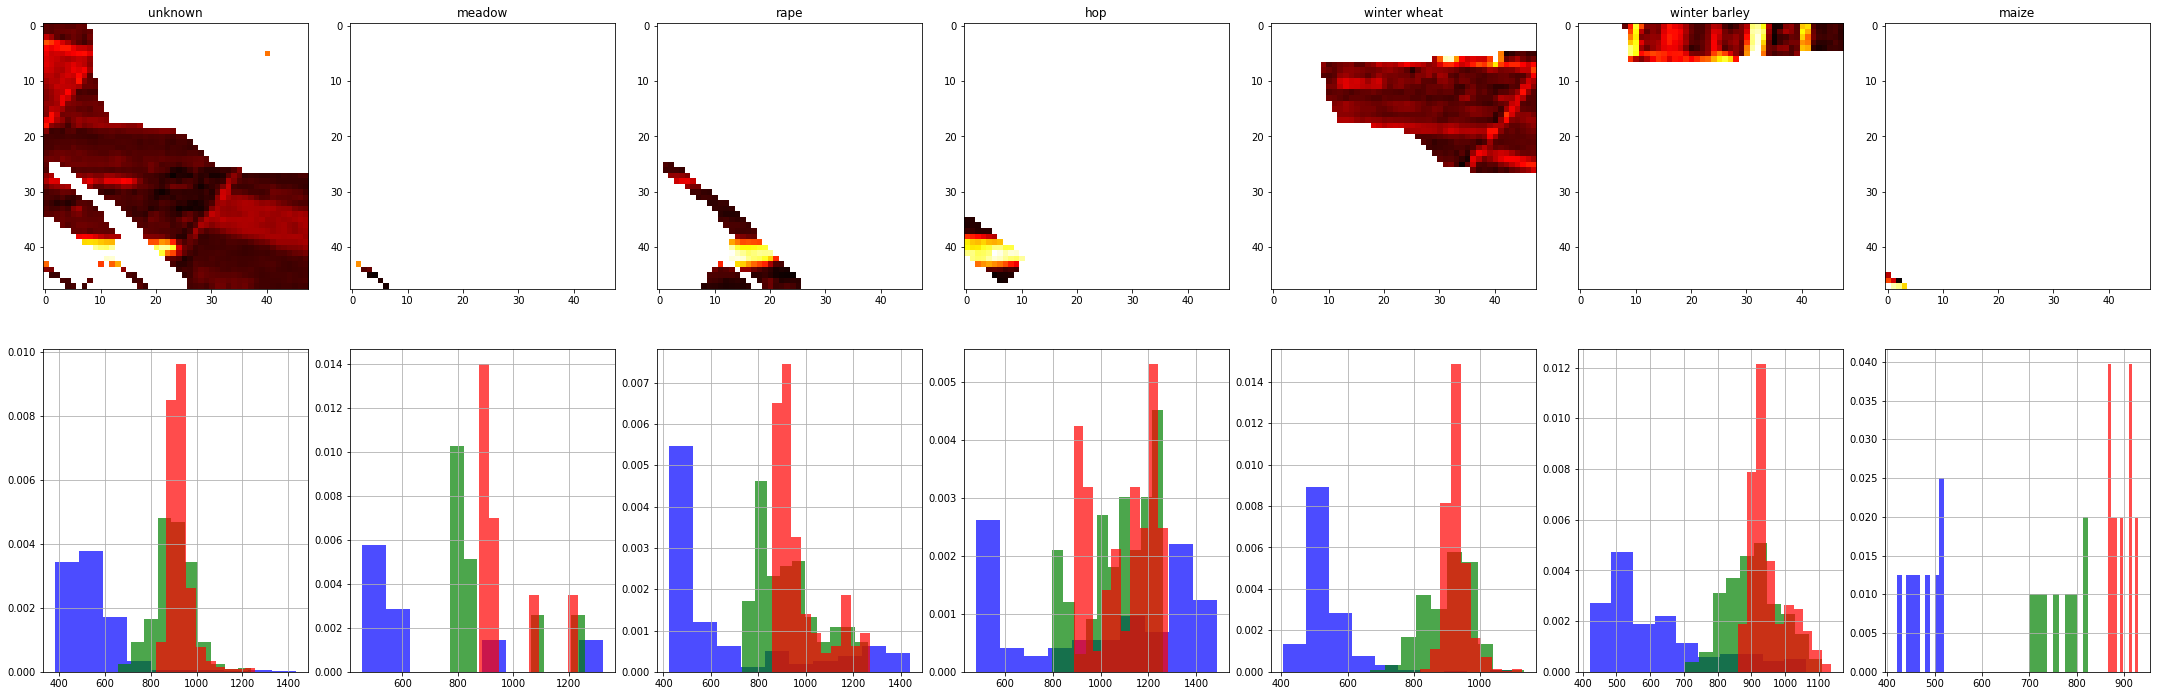

In [608]:
tile_choice = 100
raster_choice = 6
# specify root of dataset tree
root_dir = "/home/DATA/bigmig/data/Moz/repos/MTLCC-pytorch/data/"


# location where data is stored. 
data_dir = os.path.join(root_dir,"data")
# each tile has its own directory, within are time histories and labels 
tile_ids = os.listdir(data_dir)

# choose a tile_id
tile_id = tile_ids[tile_choice]
# make a path to the chosen dir 
tile_dir = os.path.join(data_dir, tile_id)
# make a list of all 10m raster files in this directory 
raster_files_10m = glob.glob(tile_dir + "/*10m.tif", recursive=True)
# choose a raster file, open it with rasterio
raster = rio.open(raster_files_10m[raster_choice])
# locate the label file
label_file = glob.glob(tile_dir + "/y.tif", recursive=True)
# open the label file in rasterio
label = rio.open(label_file[0])


def read_raster(file):
    """
    Input: a geotiff file
    
    Returns: a numpy array containing pixel values, and a dictionary containing
    the properties 
    """
    with rio.open(file) as src:
        return src.read(), src.profile

    
    # make a mask of each crop type

raster_ndarray, props = read_raster(raster_files[raster_choice])
label_ndarray, label_props = read_raster(label_file[0])

# find classes present in this label array
class_ids = np.unique(label_ndarray)
# look up class names using class ids from classes dictionary
class_names = [classes[id] for id in class_ids]  

nclasses = len(class_ids)






%matplotlib inline
# plot it
fig,ax = plt.subplots(nrows = 2, ncols=nclasses, figsize = (30,10))
fig.tight_layout()

bins = 10
ix = 0
cumulative = False
alpha = 0.7
density = 1
for class_id in class_ids:
    # mask the raster array using the locations where the label array is equal to 
    # the class id
    masked_img = np.where(label_ndarray==class_id, raster_ndarray, np.nan)

    
    ax[0,ix].imshow(masked_img[0],cmap="hot")
    ax[0,ix].set_title(classes[class_id])

    ax[1,ix].hist(np.ravel(masked_img[0]), bins=bins, color="blue", density=density,cumulative=cumulative,alpha=alpha)
    ax[1,ix].hist(np.ravel(masked_img[1]), bins=bins, color="green", density=density,cumulative=cumulative,alpha=alpha)
    ax[1,ix].hist(np.ravel(masked_img[2]), bins=bins, color="red", density=density,cumulative=cumulative,alpha=alpha)

    #ax[1,ix].hist(np.ravel(masked_img[3]), bins=bins, color="black")
    ax[1,ix].grid()
    ix+=1



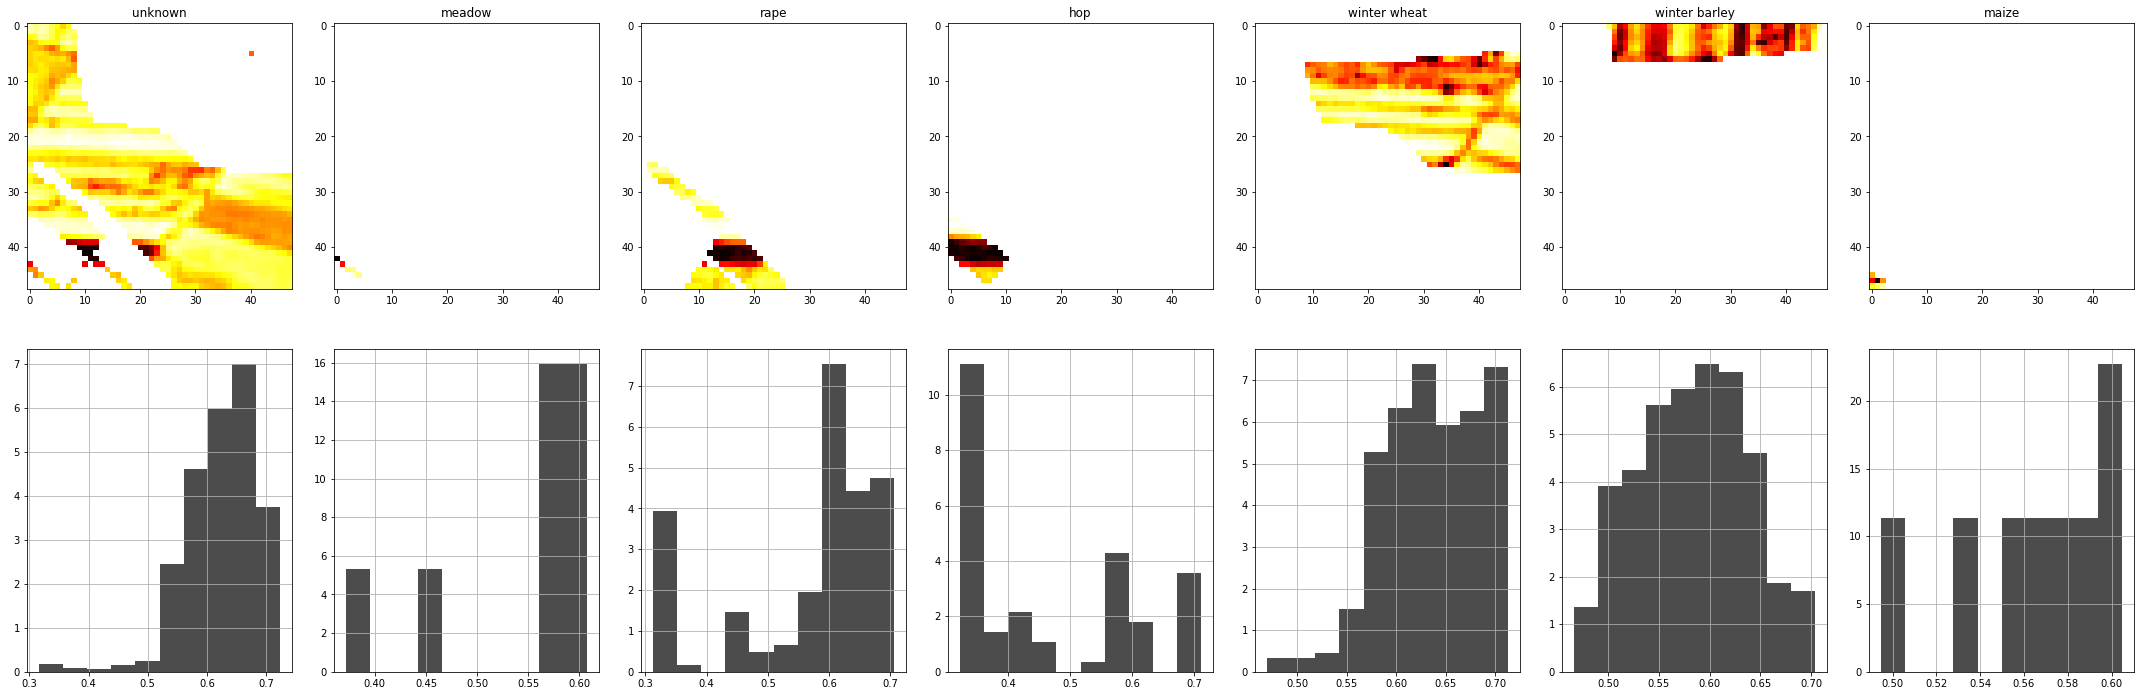

In [624]:
ndvi = (raster_ndarray[3] - raster_ndarray[2])/(raster_ndarray[3] + raster_ndarray[2])

%matplotlib inline
# plot it
fig,ax = plt.subplots(nrows = 2, ncols=nclasses, figsize = (30,10))
fig.tight_layout()

bins = 10
ix = 0
cumulative = False
alpha = 0.7
density = 1


for class_id in class_ids:
    # mask the raster array using the locations where the label array is equal to 
    # the class id
    masked_img = np.where(label_ndarray==class_id, ndvi, np.nan)

    
    ax[0,ix].imshow(masked_img[0],cmap="hot")
    ax[0,ix].set_title(classes[class_id])

    ax[1,ix].hist(np.ravel(masked_img[0]), bins=bins, color="black", density=density,cumulative=cumulative,alpha=alpha)

    ax[1,ix].grid()
    ix+=1



Text(0.5, 1.0, 'meadow')

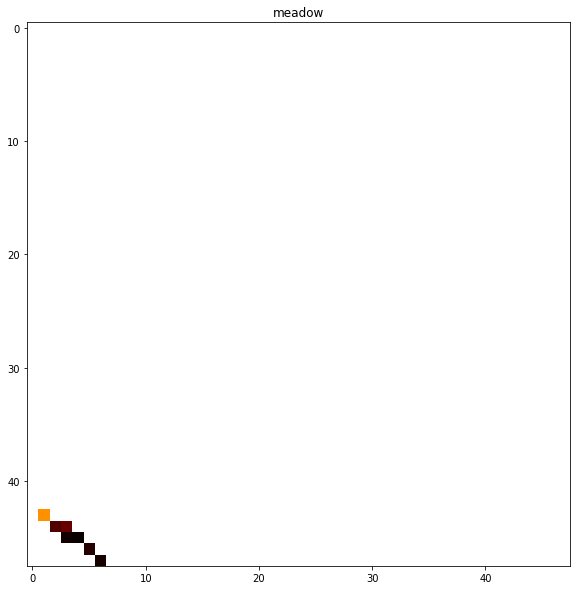

In [606]:
# pick one class id
class_id = class_ids[1]

# make figure and axis 
fig,ax = plt.subplots(nrows = 1, ncols=1, figsize = (10,10))

# mask the raster array using the locations where the label array is equal to 
# the class id
masked_img = np.where(label_ndarray==class_id, raster_ndarray, np.nan)

# plot the pixels for a single band
ax.imshow(masked_img[0],cmap="hot")
# add a title
ax.set_title(classes[class_id])





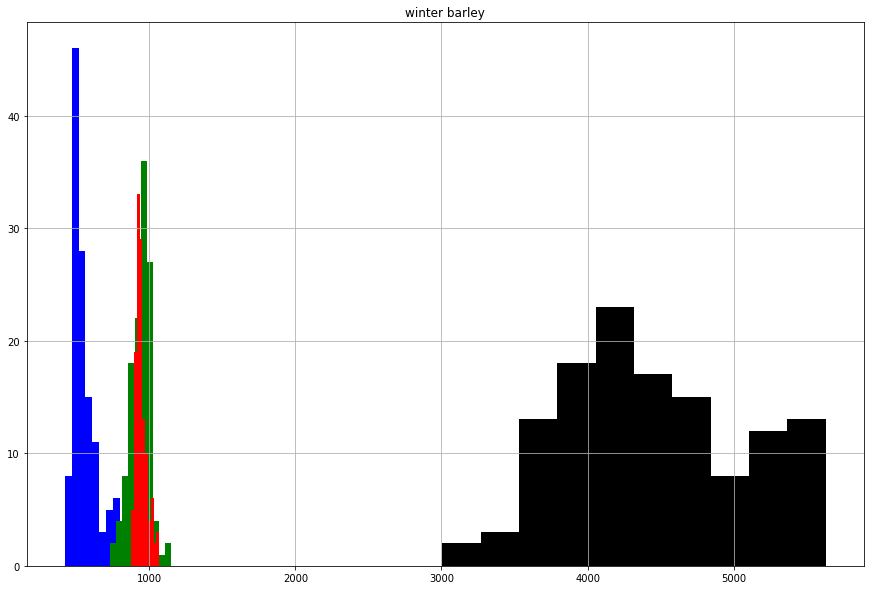

In [561]:
bins = 10

fig2,ax2 = plt.subplots(nrows = 1, ncols=1, figsize = (15,10))



ax2.hist(np.ravel(masked_img[0]), bins=bins, color="blue")
ax2.hist(np.ravel(masked_img[1]), bins=bins, color="green")
ax2.hist(np.ravel(masked_img[2]), bins=bins, color="red")
ax2.hist(np.ravel(masked_img[3]), bins=10, color="black")
ax2.set_title(classes[class_id])


ax2.grid()


In [ ]:
fig, ax = plt.subplots(nrows=2,ncols=2,figsize=(10,10))

show((raster, 1),cmap='Blues',ax=ax[0,0],title="B2: Blue")
show((raster, 2),cmap='Greens',ax=ax[0,1],title="B3: Green")
show((raster, 3),cmap='Reds',ax=ax[1,0],title="B4: Red")
show((raster, 4),cmap='hot',ax=ax[1,1],title="B8: NIR")

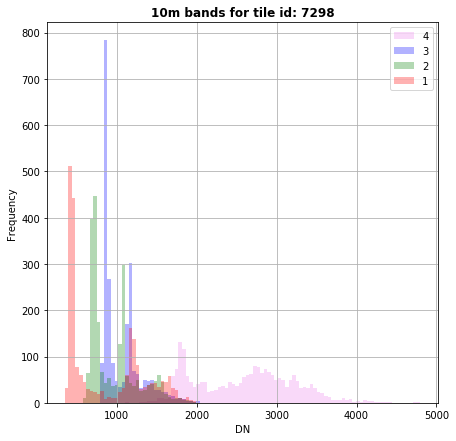

In [597]:
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(7,7))
show_hist((raster), bins = 100, lw = 0.0, stacked=False, alpha = 0.3, histtype="stepfilled", title= "10m bands for tile id: {}".format(tile_id), ax=ax)

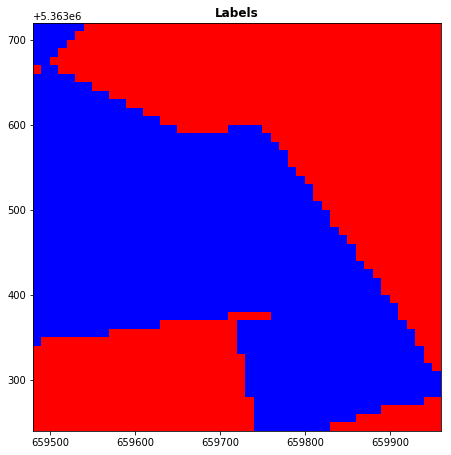

In [500]:
from matplotlib.colors import LinearSegmentedColormap

colors = [(1, 0, 0), (0, 1, 0), (0, 0, 1)]  # R -> G -> B

cmap_name = 'my_list'

cm = LinearSegmentedColormap.from_list(
    cmap_name, colors, N=3)


fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(7.5,7.5))


show((label, 1),cmap=cm,ax=ax,title="Labels")



In [284]:

    
    
# %matplotlib notebook
# plt.imshow(label.read(1))

<open DatasetReader name='/home/DATA/bigmig/data/Moz/repos/MTLCC-pytorch/data/data/11255/y.tif' mode='r'>

In [99]:
# def get_tiff(data_dir, ix1=0, ix2=0):
    
#     tile_ids = os.listdir(data_dir)
#     tile_id = tile_ids[ix1]
#     tile_dir = os.path.join(data_dir, tile_id)
#     tiffs = glob.glob(tile_dir + "/*.tif", recursive=True)
    
#     return rio.open(tiffs[ix2])

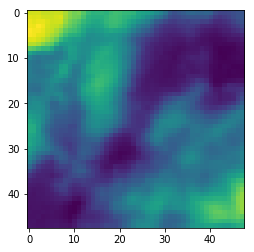

In [117]:
# tiff = get_tiff(data_dir)
# band1 = tiff.read(1)
# plt.imshow(band1)

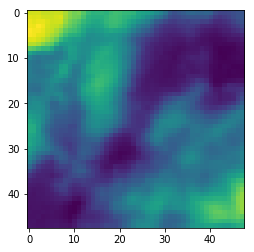